In [2]:
import pandas as pd

# Age groups in Italy

In [3]:
dfs = pd.read_excel("./WPP2019_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.xlsx", sheet_name='ESTIMATES',
                    index=['Index'],header=[1])

In [4]:
italy_df = dfs[(dfs['Region, subregion, country or area *']=='Italy') &
              (dfs['Reference date (as of 1 July)']==2020)]

In [5]:
italy_df

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),0-4,5-9,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
3554,3555,Estimates,Italy,NaN,380,Country/Area,925,2020,2324.69,2670.3,...,4658.95,3953.57,3531.3,3391.8,2637.11,2302.39,1397.26,639.739,172.639,16.517


In [6]:
italy_sel = italy_df[['Region, subregion, country or area *',
       '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85-89', '90-94', '95-99', '100+']]

In [7]:
italy_sel.rename(columns={'Region, subregion, country or area *': 'country'}, inplace=True)

/Users/davide/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
italy_ag = italy_sel.unstack().reset_index(name='value')\
                    .rename(columns={'level_0': 'age_groups', 'value': 'Population'}).iloc[1:]

In [9]:
italy_ag = italy_ag.drop('level_1', axis=1)

In [10]:
italy_ag.head()

,age_groups,Population
1,0-4,2324.69
2,5-9,2670.3
3,10-14,2857.36
4,15-19,2876.09
5,20-24,2942.51


In [11]:
italy_ag = italy_ag[:-5].append({'age_groups' : '80+' , 'Population' : italy_ag[-5:].Population.sum()} , ignore_index=True)

In [12]:
italy_ag['Population'] = italy_ag['Population']*1000.

In [13]:
italy_ag

,age_groups,Population
0,0-4,2.32469e+06
1,5-9,2.6703e+06
2,10-14,2.85736e+06
3,15-19,2.87609e+06
4,20-24,2.94251e+06
5,25-29,3.16093e+06
6,30-34,3.36551e+06
7,35-39,3.63292e+06
8,40-44,4.18898e+06
9,45-49,4.83302e+06


In [14]:
italy_ag.to_csv('Italian_population_per_age.csv')

# Contact matrices

In [15]:
'''home =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_home_1.xlsx", 
                         sheet_name='Italy')
school =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_school_1.xlsx", 
                         sheet_name='Italy')
work =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_work_1.xlsx", 
                         sheet_name='Italy')
others =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_other_locations_1.xlsx", 
                         sheet_name='Italy')'''

'home =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_home_1.xlsx", \n                         sheet_name=\'Italy\')\nschool =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_school_1.xlsx", \n                         sheet_name=\'Italy\')\nwork =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_work_1.xlsx", \n                         sheet_name=\'Italy\')\nothers =  pd.read_excel("./Contat_matrices/contact_matrices_152_countries/MUestimates_other_locations_1.xlsx", \n                         sheet_name=\'Italy\')'

In [16]:
standard_contacts = pd.read_csv('./Contat_matrices/20200324145954_social_contact_matrix.csv')

In [17]:
standard_contacts

,age_group,"contact_[0,5)","contact_[5,10)","contact_[10,15)","contact_[15,20)","contact_[20,25)","contact_[25,30)","contact_[30,35)","contact_[35,40)","contact_[40,45)","contact_[45,50)","contact_[50,55)","contact_[55,60)","contact_[60,65)","contact_[65,70)","contact_[70,75)","contact_[75,80)",contact_80+
0,"[0,5)",3.478473,1.116026,0.297388,0.193122,0.631750,0.370564,1.244903,1.462545,1.103045,1.211635,0.380688,0.632830,0.493241,0.389267,0.366959,0.113732,0.147612
1,"[5,10)",1.134844,9.123083,1.662754,0.255659,0.293552,0.439148,1.061987,1.485227,1.809991,1.041467,0.970363,1.103910,0.394156,0.459882,0.235483,0.197905,0.162216
2,"[10,15)",0.291381,1.602156,14.619724,1.482606,0.548299,0.435518,0.548397,0.795943,1.662836,1.072840,2.584818,1.008618,0.672240,0.340633,0.271070,0.089991,0.138822
3,"[15,20)",0.182631,0.237761,1.430967,16.746679,1.487081,1.031397,0.571621,0.918785,1.454897,2.152342,2.207097,0.581033,0.419777,0.163117,0.137702,0.314659,0.154388
4,"[20,25)",0.550160,0.251400,0.487329,1.369417,4.946697,3.410796,1.387714,1.069173,1.369553,1.263454,1.157867,0.976142,0.669519,0.215077,0.348910,0.088710,0.131477
5,"[25,30)",0.270087,0.314767,0.323973,0.794921,2.854650,3.336159,2.465497,1.778677,1.353991,1.042283,1.116937,1.149350,0.798866,0.395133,0.428845,0.215647,0.321044
6,"[30,35)",0.754400,0.632884,0.339174,0.366296,0.965657,2.049889,2.553654,2.278818,1.771736,1.226388,1.035087,0.934135,1.018905,0.673661,0.218946,0.051679,0.149532
7,"[35,40)",0.841023,0.839904,0.467134,0.558689,0.705998,1.403315,2.162429,3.044802,2.577342,1.515880,1.116062,0.959373,0.884255,0.736347,0.377341,0.186658,0.100758
8,"[40,45)",0.647053,1.044146,0.995537,0.902478,0.922534,1.089738,1.715060,2.629179,3.104735,1.729641,1.777114,1.028118,0.954831,0.539787,0.635476,0.329813,0.131543
9,"[45,50)",0.807757,0.682799,0.729972,1.517324,0.967220,0.953355,1.349183,1.757421,1.965707,1.544041,1.498099,1.244584,0.797223,0.511855,0.402179,0.402963,0.243988


# Elaboration of national data from Protezione Civile

In [18]:
import glob

glued_data = pd.DataFrame()
for file_name in glob.glob('./dati-andamento-nazionale/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [19]:
glued_data.sort_values('data', inplace=True)

In [20]:
glued_data.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi'],
      dtype='object')

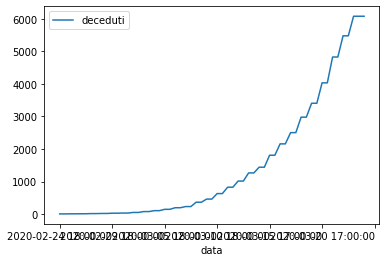

In [21]:
glued_data.plot('data', 'deceduti')

In [22]:
glued_data.to_csv('italian_data.csv')

# Dati per Regione

In [23]:
import glob

glued_data = pd.DataFrame()
for file_name in glob.glob('./dati-regioni/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [24]:
glued_data.sort_values('data', inplace=True)

In [25]:
glued_data

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
7,2020-02-24 18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,2020-02-24 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2020-03-23 17:00:00,ITA,18,Calabria,38.905976,16.594402,82,20,102,178,280,20,5,7,292,4073
590,2020-03-23 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,145,33,178,510,688,40,7,29,724,6084
589,2020-03-23 17:00:00,ITA,17,Basilicata,40.639471,15.805148,15,12,27,62,89,8,0,1,90,696
597,2020-03-23 17:00:00,ITA,3,Lombardia,45.466794,9.190347,9266,1183,10449,8461,18910,1025,6075,3776,28761,73242


In [26]:
glued_data.to_csv('italian_regional_data.csv')